# Лабораторная работа № 2

In [100]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import math
import pandas as pd
from matrix import Matrix
from typing import Callable

зависимость от количества вычислений

In [101]:
def drawGraph(f: Callable[[float], pd.DataFrame],
              g: Callable[[float], pd.DataFrame],
              end: int = 10):
    fs = []
    gs = []
    for precision in range(end):
        epsilon = 1 / (10 ** precision)
        fs.append(f(epsilon).shape[0])
        gs.append(g(epsilon).shape[0])
    plt.plot(range(end), fs, "r", label=f.__name__)
    plt.plot(range(end), gs, "b", label=g.__name__)
    plt.xticks(ticks=range(0, end, 2),
               labels=[f"10^(-{p})" for p in range(0, end, 2)],
               rotation=-45)
    plt.legend()
    plt.draw()

### Задание № 1
Реализовать методы простой итерации и Ньютона решения нелинейных
уравнений в виде программ, задавая в качестве входных данных
точность вычислений. С использованием разработанного программного
обеспечения найти положительный корень нелинейного уравнения
(начальное приближение определить графически).
Проанализировать зависимость погрешности вычислений
от количества итераций.
$$ f(x) = e^x - 2x - 2 = 0 $$
$$ x = g(x) = ln(2x + 2) $$

In [102]:
x = sp.symbols("x")
y = math.e ** x - 2 * x - 2
y_func = sp.lambdify(x, y)

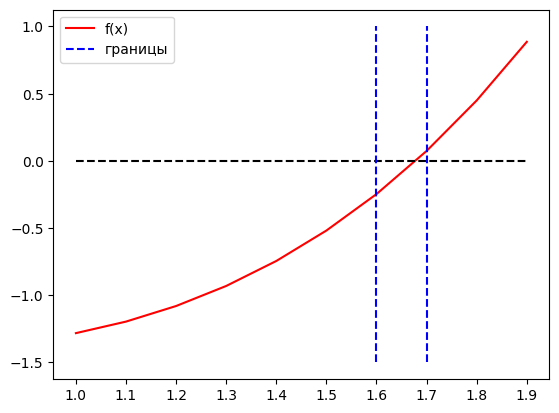

In [103]:
xs = np.arange(1, 2, 0.1)
plt.plot(xs, y_func(xs), 'r', label='f(x)')
plt.plot(xs, xs * 0, "k--")

start = 1.6
end = 1.7

plt.vlines([start, end], -1.5, 1, linestyles='dashed', colors='blue',
           label="границы")
plt.xticks(xs)
plt.legend()
plt.show()

#### Простая итерация

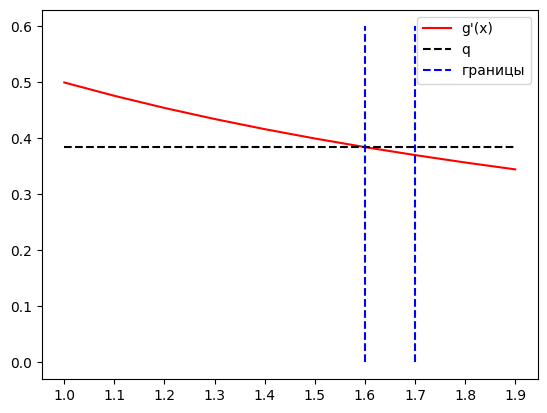

In [104]:
x_x = sp.log(2*x + 2)
x_diff = x_x.diff()
x_x_func = sp.lambdify(x, x_x)
x_x_diff_func = sp.lambdify(x, x_diff)

q = x_x_diff_func(start)

plt.plot(xs, x_x_diff_func(xs), 'r', label="g'(x)")
plt.plot(xs, xs - xs + q, "k--", label="q")
plt.vlines([start, end], 0, 0.6, linestyles='dashed', colors='blue',
           label="границы")
plt.xticks(xs)
plt.legend()
plt.show()

q = {eval}`float(q)`

In [105]:
def iter(epsilon: float):
    res = [x_x_func((start + end) / 2)]
    coef = q / (1 - q)
    diff = []
    for _ in range(10000):
        res.append(x_x_func(res[-1]))
        diff.append(coef * abs(res[-1] - res[-2]))
        if abs(diff[-1]) <= epsilon:
            break

    data = {
        'x': res,
        'g(x)': res[1:],
        'ε': diff,
    }

    df = pd.DataFrame({key: pd.Series(value) for key, value in data.items()})
    return df.fillna("")


iter(0.0001)

,x,g(x),ε
0,1.667707,1.674366,0.004162
1,1.674366,1.67686,0.001558
2,1.676860,1.677792,0.000582
3,1.677792,1.67814,0.000218
4,1.678140,1.67827,0.000081
5,1.678270,,


#### метод ньютона

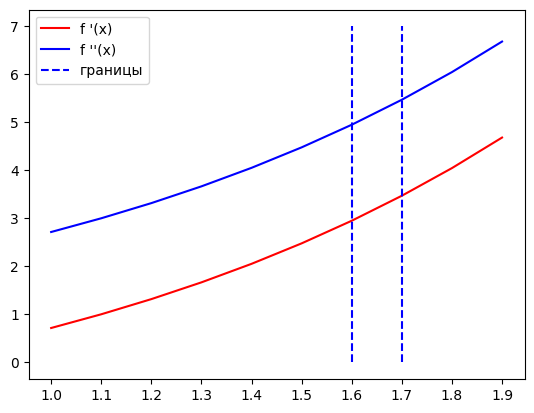

In [106]:
y_x = y.diff()
y_xx = y_x.diff()
y_x_func = sp.lambdify(x, y_x)
y_xx_func = sp.lambdify(x, y_xx)

plt.plot(xs, y_x_func(xs), 'r', label="f '(x)")
plt.plot(xs, y_xx_func(xs), 'b', label="f ''(x)")
plt.vlines([start, end], 0, 7, linestyles='dashed', colors='blue',
           label="границы")
plt.xticks(xs)
plt.legend()
plt.show()

так как обе производные на отрезке [{eval}`start`; {eval}`end`]
положительные, то в качестве $x_0$ можно взять правую
границу: $x_0=$ {eval}`end`

In [107]:
def newton(epsilon: float) -> pd.DataFrame:
    res = [end]
    diff = []
    fx = []
    fxx = []
    sub = []
    for k in range(100000):
        fx.append(y_func(res[-1]))
        fxx.append(y_x_func(res[-1]))
        sub.append(-fx[-1] / fxx[-1])
        res.append(res[-1] + sub[-1])
        diff.append(abs(res[-1] - res[-2]))
        if diff[-1] < epsilon:
            break

    data = {
        'x': res,
        'f(x)': fx,
        'f\'(x)': fxx,
        '-f(x)/f\'(x)': sub,
        'ε': diff,
    }

    df = pd.DataFrame({key: pd.Series(value) for key, value in data.items()})
    return df.fillna("")


newton(0.0001)

,x,f(x),f'(x),-f(x)/f'(x),ε
0,1.700000,0.073947,3.473947,-0.021286,0.021286
1,1.678714,0.001231,3.358659,-0.000367,0.000367
2,1.678347,0.0,3.356695,-0.0,0.0
3,1.678347,,,,


зависимость количества итераций

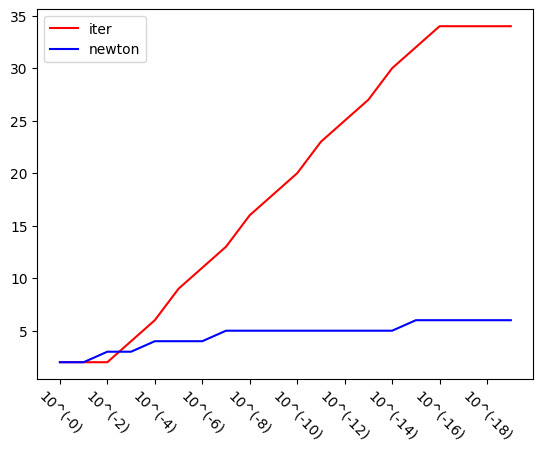

In [108]:
drawGraph(iter, newton, end=20)

### Задание № 2

Реализовать методы простой итерации и Ньютона решения систем
нелинейных уравнений в виде программного кода, задавая в качестве
входных данных точность вычислений. С использованием разработанного
программного обеспечения решить систему нелинейных уравнений
(при наличии нескольких решений найти то из них, в котором значения
неизвестных являются положительными); начальное приближение
определить графически. Проанализировать зависимость погрешности
вычислений от количества итераций.
Реализовать методы простой итерации и Ньютона решения систем
\begin{align}
& a = 3 \\
& x_1 - cos(x_2) = 1 \\
& x_2 - lg(x_1 + 1) = a
\end{align}

\begin{align}
& x_1 - cos(x_2) = 1 \\
& x_2 - lg(x_1 + 1) = 3
\end{align}
\begin{align}
& x_1 =  1 - cos(x_2) = \phi_1(x_1, x_2) \\
& x_2 = 3 - lg(x_1 + 1) = \phi_2(x_1,x_2)
\end{align}

In [109]:
x1, x2 = sp.symbols("x1 x2")
phi1 = 1 + sp.cos(x2)
phi2 = 3 + sp.log(x1 + 1, 10)

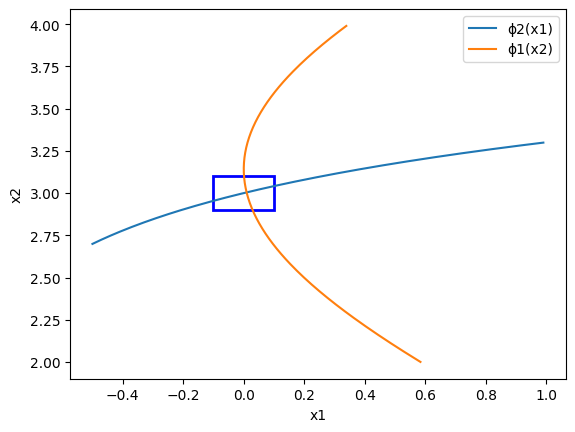

In [110]:
x1_s = -0.1
x1_e = 0.1
x2_s = 2.9
x2_e = 3.1


phi1_f = sp.lambdify(x2, phi1)
phi2_f = sp.lambdify(x1, phi2)
x1s = np.arange(-0.5, 1, 0.01)
x2s = np.arange(2.0, 4.0, 0.01)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel(x1)
plt.ylabel(x2)
rect1 = mpatches.Rectangle((x1_s, x2_s), x1_e - x1_s, x2_e - x2_s,
                           color='blue', fc='none', lw=2)
ax.add_patch(rect1)
ax.plot(x1s, phi2_f(x1s), label="ϕ2(x1)")
ax.plot(phi1_f(x2s), x2s, label="ϕ1(x2)")
ax.legend()
plt.show()

$ x_1 \in $ [{eval}`x1_s`; {eval}`x1_e`]

$ x_2 \in $ [{eval}`x2_s`; {eval}`x2_e`]

#### Метод простых итераций

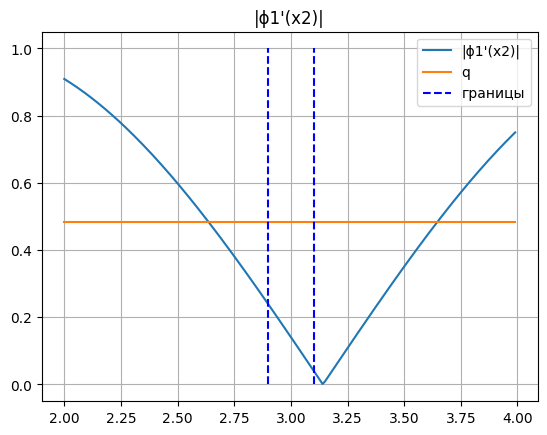

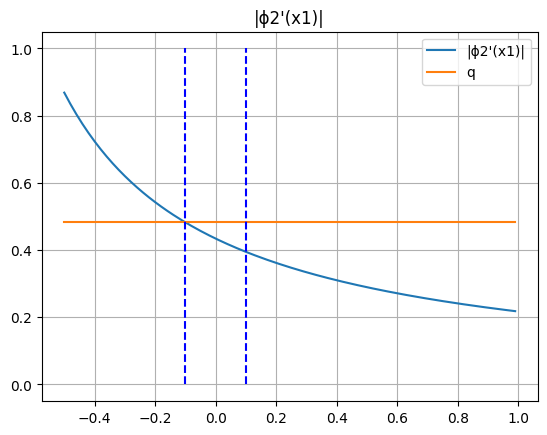

In [111]:
phi1_diff = phi1.diff()
phi2_diff = phi2.diff()

phi1_diff_f = sp.lambdify(x2, phi1_diff)
phi2_diff_f = sp.lambdify(x1, phi2_diff)

q = abs(phi2_diff_f(x1_s))

plt.title("|ϕ1'(x2)|")
plt.plot(x2s, abs(phi1_diff_f(x2s)), label="|ϕ1'(x2)|")
plt.plot(x2s, x2s * 0 + q, label="q")
plt.vlines([x2_s, x2_e], 0, 1, linestyles='dashed', colors='blue',
           label="границы")
plt.grid(True)
plt.legend()
plt.show()

plt.title("|ϕ2'(x1)|")
plt.plot(x1s, abs(phi2_diff_f(x1s)), label="|ϕ2'(x1)|")
plt.plot(x1s, x1s * 0 + q, label="q")
plt.grid(True)
plt.legend()
plt.vlines([x1_s, x1_e], 0, 1, linestyles='dashed', colors='blue',
           label="границы")
plt.show()

$ max||\phi'(x)|| \le $ {eval}`float(q)` $ = q < 1 $

In [112]:
def iterSystem(epsilon: float) -> pd.DataFrame:
    r1 = [(x1_s + x1_e) / 2]
    r2 = [(x2_s + x2_e) / 2]
    diff = []
    coef = q/(1-q)
    for k in range(100000):
        x1t = phi1_f(r2[-1])
        x2t = phi2_f(r1[-1])
        r1.append(x1t)
        r2.append(x2t)
        diff.append(coef * max(
            abs(r1[-1] - r1[-2]),
            abs(r2[-1] - r2[-2])
        ))
        if diff[-1] < epsilon:
            break

    data = {
        'x1': r1,
        'x2': r2,
        'ϕ1(x2)': r1[1:],
        'ϕ2(x1)': r2[1:],
        'ε': diff,
    }

    df = pd.DataFrame({key: pd.Series(value) for key, value in data.items()})
    return df.fillna("")


iterSystem(0.0001)

,x1,x2,ϕ1(x2),ϕ2(x1),ε
0,0.000000,3.000000,0.010008,3.0,0.009333
1,0.010008,3.000000,0.010008,3.004325,0.004033
2,0.010008,3.004325,0.009406,3.004325,0.00056
3,0.009406,3.004325,0.009406,3.004066,0.000241
4,0.009406,3.004066,0.009442,3.004066,0.000033
5,0.009442,3.004066,,,


#### Метод Ньютона

In [113]:
f1 = x1 - sp.cos(x2) - 1
f2 = x2 - sp.log(x1 + 1, 10) - 3

f1_x1 = f1.diff(x1)
f1_x2 = f1.diff(x2)
f2_x1 = f2.diff(x1)
f2_x2 = f2.diff(x2)

f1f = sp.lambdify((x1, x2), f1)
f2f = sp.lambdify((x1, x2), f2)

f1_x1f = sp.lambdify((x1, x2), f1_x1)
f1_x2f = sp.lambdify((x1, x2), f1_x2)
f2_x1f = sp.lambdify((x1, x2), f2_x1)
f2_x2f = sp.lambdify((x1, x2), f2_x2)

In [114]:
def newtonSystem(epsilon: float) -> pd.DataFrame:
    r1 = [(x1_s + x1_e) / 2]
    r2 = [(x2_s + x2_e) / 2]

    f1s = []
    f2s = []
    df11s = []
    df12s = []
    df21s = []
    df22s = []
    deta1 = []
    deta2 = []
    detj = []
    diff = []

    for k in range(100000):
        f1s.append(f1f(r1[-1], r2[-1]))
        f2s.append(f2f(r1[-1], r2[-1]))
        df11s.append(f1_x1f(r1[-1], r2[-1]))
        df12s.append(f1_x2f(r1[-1], r2[-1]))
        df21s.append(f2_x1f(r1[-1], r2[-1]))
        df22s.append(f2_x2f(r1[-1], r2[-1]))
        a1 = Matrix([
                [f1s[-1], df12s[-1]],
                [f2s[-1], df22s[-1]]
        ])
        a2 = Matrix([
                [df11s[-1], f1s[-1]],
                [df21s[-1], f2s[-1]]
        ])
        j = Matrix([
            [df11s[-1], df12s[-1]],
            [df21s[-1], df22s[-1]]
        ])
        deta1.append(a1.det())
        deta2.append(a2.det())
        detj.append(j.det())
        r1.append(r1[-1] - deta1[-1]/detj[-1])
        r2.append(r2[-1] - deta2[-1]/detj[-1])
        diff.append(max(
            abs(r1[-1] - r1[-2]),
            abs(r2[-1] - r2[-2])
        ))
        if diff[-1] < epsilon:
            break

    data = {
        'x1': r1,
        'x2': r2,
        'f1(x1, x2)': f1s,
        'f2(x1, x2)': f2s,
        'd11': df11s,
        'd21': df21s,
        'd12': df12s,
        'd22': df22s,
        'det A1': deta1,
        'det A2': deta2,
        'det J': detj,
        'ε': diff,
    }

    df = pd.DataFrame({key: pd.Series(value) for key, value in data.items()})
    return df.fillna("")


newtonSystem(0.0001)

,x1,x2,"f1(x1, x2)","f2(x1, x2)",d11,d21,d12,d22,det A1,det A2,det J,ε
0,0.00000,3.000000,-0.010008,0.0,1.0,-0.434294,0.14112,1.0,-0.010008,-0.004346,1.061288,0.00943
1,0.00943,3.004095,-0.000008,0.000019,1.0,-0.430238,0.137065,1.0,-0.000011,0.000016,1.05897,0.000015
2,0.00944,3.004080,,,,,,,,,,


зависимость количества итераций

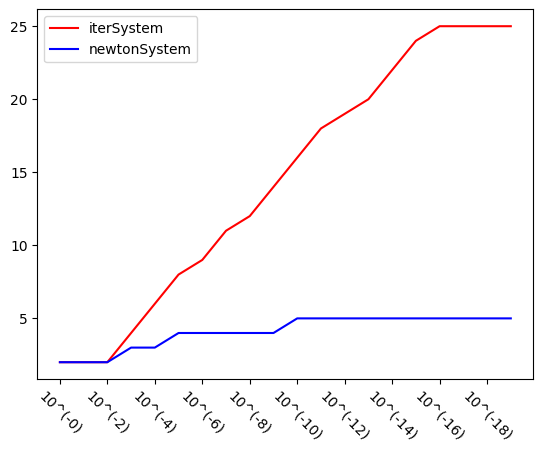

In [115]:
drawGraph(iterSystem, newtonSystem, end=20)